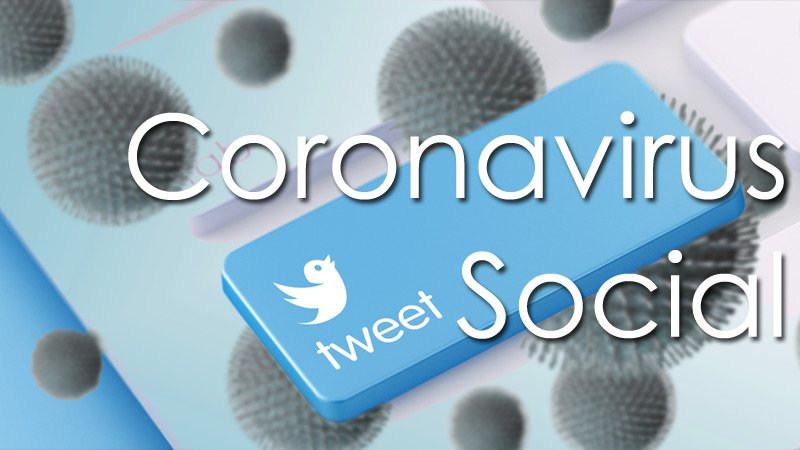

* Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment.

* In this notebook, we would perform Sentiment Analysis for the Covid-19 Tweets through passing differnet steps such as:
* Data underestanding
* Data Visualization
* WordCloud
* Data Preprocessing for the NLP Natural language processing
* Building different Machine Learning Models
* Model Evaluation

# Importing the necessary libraries:

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 

!pip install millify
from millify     import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS
from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

import warnings
warnings.filterwarnings("ignore")

  Created wheel for millify: filename=millify-0.1.1-py3-none-any.whl size=1867 sha256=fa45c476c2687a25e533a870af8a7dd2599f44902663e460661f569246c11a0b
  Stored in directory: /root/.cache/pip/wheels/38/26/25/c2a8bb99a5cf348903e6ac35a29878e221cc9daeb698545148
Successfully built millify
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Data Underestanding

# Improting the dataset into the kernel

In [2]:
df=pd.read_csv("../input/covid19-tweets/covid19_tweets.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
df.shape

(179108, 13)

In [4]:
print('There are {} rows and {} columns in the dataset'.format(df.shape[0], df.shape[1]))

There are 179108 rows and 13 columns in the dataset


In [5]:
#let's get some information about the data types of our dataset by executing the code below
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


### Missing Values

In [6]:
#Let's find out about the missing values in the dataset by executing the code below:
df.isna().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

# Data Visualization

# Let's visualizing the missing values

In [7]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

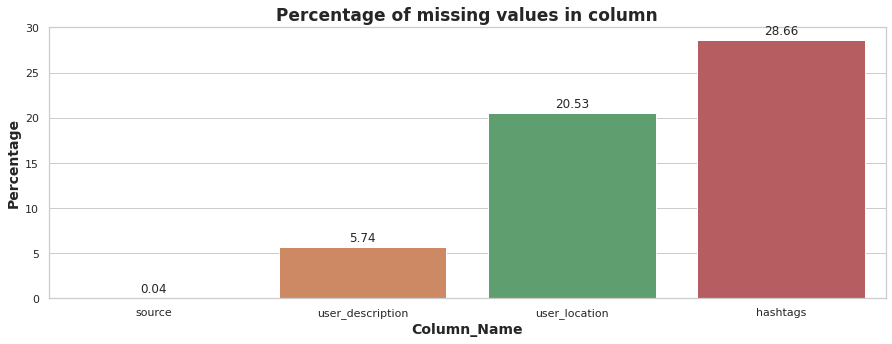

In [8]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

# Observation:
* The above barplot shows us that there are only four columns with missing values
* Percentage of missing values are also shown in the plot

In [9]:
df_username_count = df['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweet_count','index':'user_name'})

In [10]:
df = pd.merge(df, df_username_count, on='user_name')

# Top50 users by number of followers - Barplot:

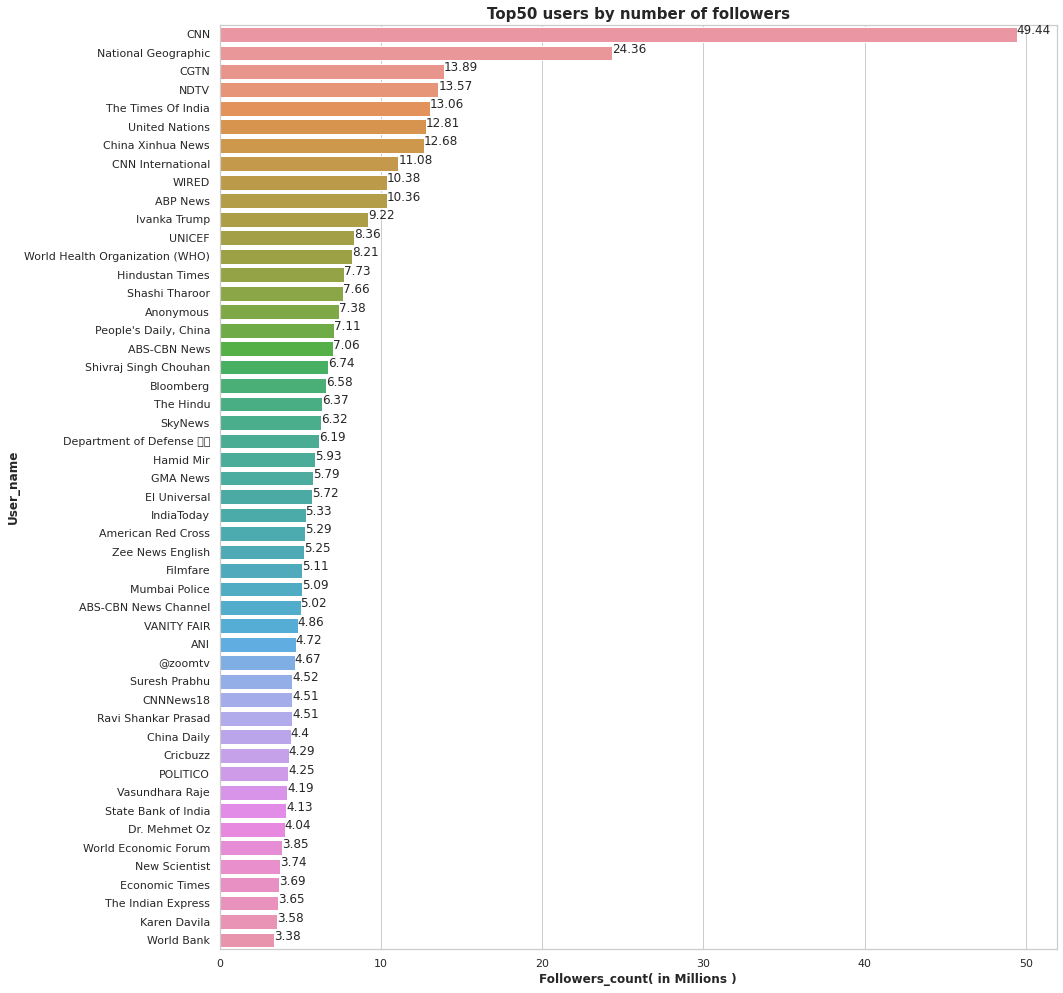

In [11]:
data = df.sort_values('user_followers',ascending=False).drop_duplicates(subset='user_name', keep="first")
data = data[['user_name', 'user_followers', 'tweet_count']]
data.sort_values('user_followers',ascending=False)

data1 = data.head(50).reset_index().copy()
for i in range(50):
    data1['user_followers'][i] = millify(data1['user_followers'][i],precision=2)
    
data1['user_followers'] = data1['user_followers'].str[:-1].astype(float) # To remove 'M'

plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='user_followers',data=data1.head(50))
y=data1['user_followers'].head(50)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top50 users by number of followers',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Followers_count( in Millions )', size=12, weight='bold')
plt.show()

# Frequency of user_name:

In [12]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature),weight='bold', size=15)
    plt.ylabel('Frequency', size=12, weight='bold')
    plt.xlabel(title, size=12, weight='bold')
    plt.xticks(rotation=90)
    plt.show()

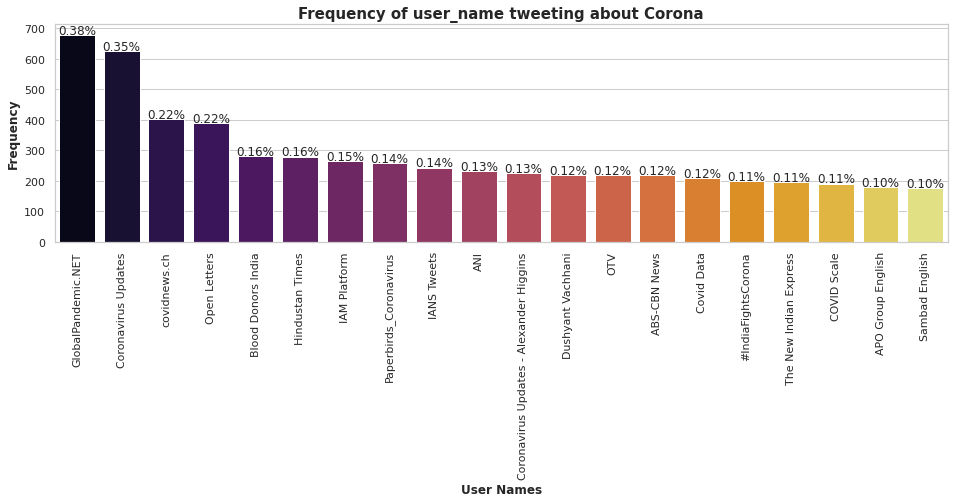

In [13]:
plot_frequency_charts(df, 'user_name', 'User Names','inferno')

# WordCloud

In [14]:
df = df.fillna('None')

def wordcloud(string,title,color):
    wc = WordCloud(background_color=color, width=1200,height=600,mask=None,random_state=1,
                   max_font_size=200,stopwords=stop_words,collocations=False).generate(string)
    fig=plt.figure(figsize=(20,8))
    plt.axis('off')
    plt.title('--- WordCloud for {} --- '.format(title),weight='bold', size=30)
    plt.imshow(wc)

In [15]:
stop_words=set(STOPWORDS)
source_string = " ".join(df['source'].astype('str'))
hastage_string = " ".join(df['hashtags'].astype('str'))
location_string = " ".join(df['user_location'].astype('str'))

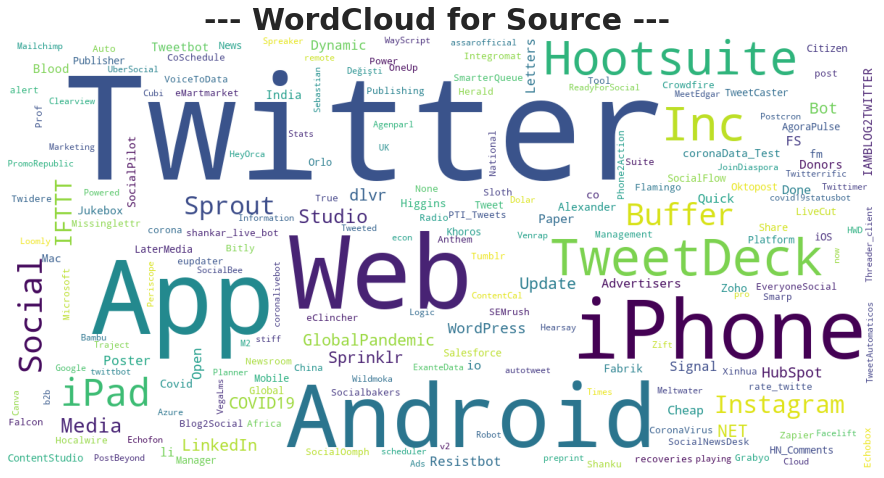

In [16]:
wordcloud(source_string,'Source','white')

# Sentiment Analysis on Covid19 Tweets

* To peform sentiment analysis we need labeled dataset.
* The data can be downloaded from here: https://www.kaggle.com/surajkum1198/twitterdata

In [17]:
data = pd.read_csv('/kaggle/input/twitterdata/finalSentimentdata2.csv')
data.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


* Count plot of sentiments,we can see that sad and fear are prevailing which is quite obvious

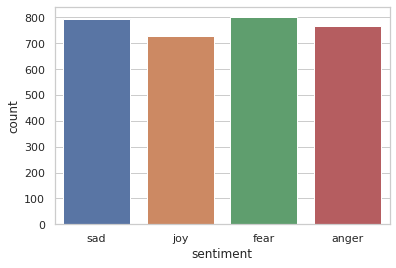

In [18]:
sns.countplot(data['sentiment'])

# Data Preprocessing
Now let us preprocess text using some NLP tchniques like:

* converting to lowercase
* remove text in square brackets,
* remove links,
* remove punctuation
* remove words containing numbers
* Removing Punctuation
* Removing stopwords
* Stemming
* Lemmatization

In [19]:
#importing the necessary libraries for preprocessing of the dataset
import nltk
import re
import string

* A function to clean data it removes all the punctuation marks, urls etc

In [20]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [21]:
data['text'] = data['text'].apply(lambda x: clean_text(x))

# Removing the Emoji
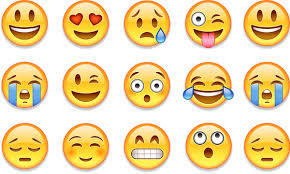

In [22]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



In [23]:
data['text']=data['text'].apply(lambda x: remove_emoji(x))

* Checking the maximum length of tweet

In [24]:
data['text'].apply(lambda x:len(str(x).split())).max()

61

# Splitting the dataset

In [25]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(data,test_size = 0.2,random_state=0,stratify = data.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (2472, 3)
valid shape :  (618, 3)


# Vectorizing

* We are going to use CountVectorizer for the following steps

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.text.values)
X_valid = vectorizer.transform(valid.text.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (2472, 8551)
X_train.shape :  (618, 8551)
y_train.shape :  (2472,)
y_valid.shape :  (618,)


# ML model building

## Grid Search
All you need to do in GridSearch is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

## Randomized Search
the grid search approach is fine when you are exploring relatevely few combinations, but when the hyperparameter search space is large, it is often preferable to use `RandomizedSearchCV` instead. This technique evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
- If you let the randomized search run for 1000 iterations it will explore 1000 different values for each hyperparameter.
- You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

# 1. Logistic Regression

Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).
- **solver** in `[‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]`

Regularization (penalty) can sometimes be helpful.
- **penalty** in `[‘none’, ‘l1’, ‘l2’, ‘elasticnet’]`

**Note:** not all solvers support all regularization terms.

- The **C** parameter controls the penality strength, which can also be effective. **C** in `[100, 10, 1.0, 0.1, 0.01]`

The example below demonstrates grid searching the key hyperparameters for LogisticRegression on a synthetic binary classification dataset.

In [27]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

Best: 0.668 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


# 2. Ridge Classifier

Ridge regression is a penalized linear regression model for predicting a numerical value.

Nevertheless, it can be very effective when applied to classification.

Perhaps the most important parameter to tune is the regularization strength (alpha). A good starting point might be values in the range `[0.1 to 1.0]`

- alpha in `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`

In [28]:
from sklearn.linear_model import RidgeClassifier

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

Best: 0.646 using {'alpha': 1.0}


# 3. K-Nearest Neighbors (KNN)

The most important hyperparameter for KNN is the number of neighbors (n_neighbors).

Test values between at least `1` and `21`, perhaps just the odd numbers.

- n_neighbors in `[1 to 21]`

It may also be interesting to test different distance metrics (metric) for choosing the composition of the neighborhood.

- metric in `[‘euclidean’, ‘manhattan’, ‘minkowski’]`

It may also be interesting to test the contribution of members of the neighborhood via different weightings (weights).

- weights in `[‘uniform’, ‘distance’]`

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, iid=True)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

Best: 0.469 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


# Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.9526699029126213
Validation accuracy Score :  0.6779935275080906
              precision    recall  f1-score   support

       anger       0.54      0.67      0.60       124
        fear       0.66      0.57      0.61       183
         joy       0.71      0.82      0.76       126
         sad       0.81      0.69      0.74       185

    accuracy                           0.68       618
   macro avg       0.68      0.69      0.68       618
weighted avg       0.69      0.68      0.68       618



# Stochastic Gradient Descent

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9991909385113269
Validation accuracy Score :  0.6893203883495146
              precision    recall  f1-score   support

       anger       0.65      0.59      0.62       169
        fear       0.54      0.67      0.60       129
         joy       0.81      0.72      0.76       162
         sad       0.77      0.77      0.77       158

    accuracy                           0.69       618
   macro avg       0.69      0.69      0.69       618
weighted avg       0.70      0.69      0.69       618



# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.6310679611650486
              precision    recall  f1-score   support

       anger       0.64      0.57      0.60       174
        fear       0.42      0.71      0.53        94
         joy       0.81      0.54      0.65       216
         sad       0.67      0.80      0.73       134

    accuracy                           0.63       618
   macro avg       0.64      0.66      0.63       618
weighted avg       0.67      0.63      0.64       618



# Extreme Gradient Boosting

In [33]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.8972491909385113
Validation accuracy Score :  0.6715210355987055
              precision    recall  f1-score   support

       anger       0.61      0.60      0.61       156
        fear       0.52      0.67      0.59       123
         joy       0.79      0.66      0.71       174
         sad       0.78      0.75      0.77       165

    accuracy                           0.67       618
   macro avg       0.67      0.67      0.67       618
weighted avg       0.69      0.67      0.68       618



# Support Vector Machine

In [34]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9397249190938511
Validation accuracy Score :  0.6197411003236246
              precision    recall  f1-score   support

       anger       0.53      0.61      0.57       134
        fear       0.49      0.62      0.55       125
         joy       0.77      0.54      0.63       206
         sad       0.70      0.73      0.72       153

    accuracy                           0.62       618
   macro avg       0.62      0.63      0.62       618
weighted avg       0.64      0.62      0.62       618



# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9955501618122977
Validation accuracy Score :  0.6957928802588996
              precision    recall  f1-score   support

       anger       0.59      0.64      0.61       143
        fear       0.58      0.63      0.60       148
         joy       0.85      0.71      0.77       173
         sad       0.77      0.80      0.79       154

    accuracy                           0.70       618
   macro avg       0.70      0.69      0.69       618
weighted avg       0.71      0.70      0.70       618



In [36]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.695793
4,Stochastic Gradient Decent,0.689320
3,Naive Bayes,0.677994
5,XGBoost,0.671521
2,Random Forest,0.631068
0,Support Vector Machines,0.619741
